# Business Understanding

## Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).

This dataset looks at the ecological data on 4 areas from Roosevelt National Forest of northern Colorado. Sampling forest cover type for a 30x30 meter areas, determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. These areas have minimal human disturbance, in order to provide insight on ecological data over forest management.

## Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

This dataset is leveraged to predict categorical values of trees, eliminating confounding factors of human interference, in order to predict a tree species, based on elevation, slope, soil type, cover type, shadow coverage, and local topography.

The insights from this data are useful for understanding the ecology of tree species in the areas sampled were pulled from (Roosevelt National Forest of north Colorado). Trees are an important part of a healthy ecosystem in earth, as they store carbon dioxide, which helps to slow global warming.

In [58]:
# Import packages

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [ ]:
# upload files from computer to google colab

forest_cover_type = files.upload()


In [13]:
# read the files into a dataframe

print(forest_cover_type.shape)
forest_cover_type.head()


(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
# data type
print(forest_cover_type.info())
print('\n')
# basic summary stats
print(forest_cover_type.describe())
print('\n')
# count the nulls
print(forest_cover_type.isnull().sum())
print('\n')
# count the frequency of each outcome
print(forest_cover_type['Cover_Type'].value_counts())

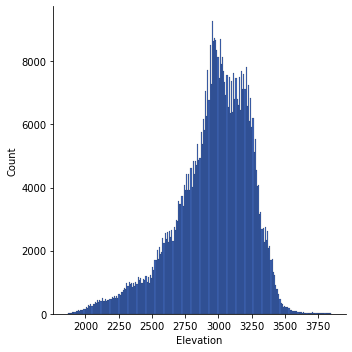

In [38]:
# distribution plot for elevation in SMU Blue
sns.displot(forest_cover_type['Elevation'], color = '#0033A0')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


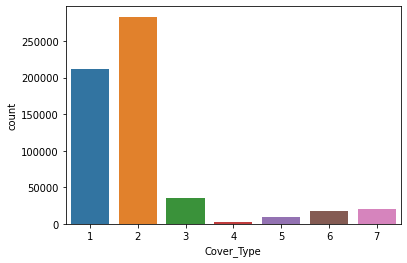

In [39]:
# count plot for cover type 
# check with value counts above
sns.countplot(forest_cover_type['Cover_Type'])

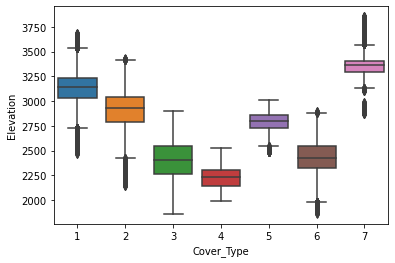

In [41]:
# box plots for elevation vs cover type
sns.boxplot(x = 'Cover_Type', y = 'Elevation', data = forest_cover_type)

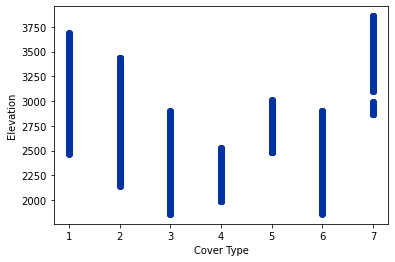

In [44]:
# scatter plot of above
plt.scatter(forest_cover_type['Cover_Type'], forest_cover_type['Elevation'], color = '#0033A0')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

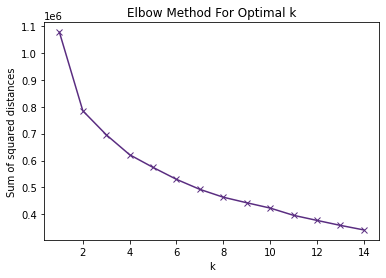

In [45]:
# takes about 1.5 minutes

# find out the best number of clusters
mms = MinMaxScaler()
data_transformed = mms.fit_transform(forest_cover_type)

Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

# plot the data to better identify how many clusters we should use
plt.plot(K, Sum_of_squared_distances, 
         'bx-', 
         color = '#5A2D81')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

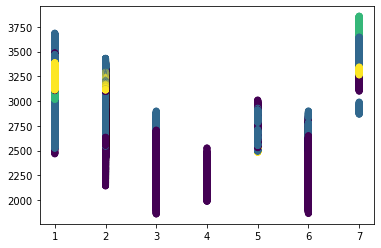

In [49]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(forest_cover_type)

plt.scatter(forest_cover_type['Cover_Type'], forest_cover_type['Elevation'], c = kmeans.labels_)
plt.show()

In [51]:
X = forest_cover_type.iloc[:, 0:55].values
y = forest_cover_type.iloc[:, 54].values

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


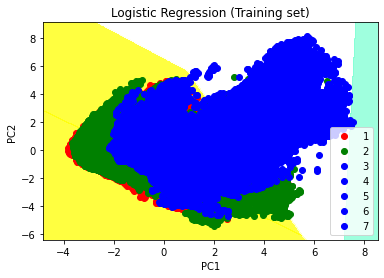

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# performing preprocessing part
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
# Below is taken from https://www.geeksforgeeks.org/principal-component-analysis-with-python/
explained_variance = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)


from matplotlib.colors import ListedColormap
  
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()

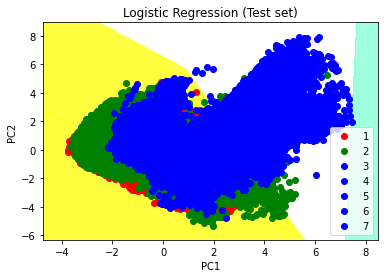

In [61]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_test, y_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()